<a href="https://colab.research.google.com/github/VismayaS25/SafeMail/blob/main/Phishing_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

. Phishing emails have become a significant threat to individuals and organizations worldwide.

. These type emails aim to trick recipients into divulging sensitive information or performing harmful actions.

. Detecting and preventing phishing emails is crucial to safeguarding personal and financial security.

. The dataset specifies the email text body the type of emails which can be used to detect phishing emails by extensive analytics of the email text and classifying those using machine learning

# Importing Libraries and Packages

In [1]:
import pandas as pd
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/drive/MyDrive/project file download/Phishing_Email.csv',nrows=2000)
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
1995,1995,don ' t be her 2 choice be the first become a ...,Phishing Email
1996,1996,\nNippon Forex Info Mail\tTD {\n\tfont-family ...,Phishing Email
1997,1997,get your bsc without any classes sdmidrxvxnto ...,Phishing Email
1998,1998,movie project hi steph i have found the talent...,Phishing Email


In [3]:
# check null values
df.isna().sum()

Unnamed: 0    0
Email Text    3
Email Type    0
dtype: int64

In [4]:
# check dtypes
df.dtypes

Unnamed: 0     int64
Email Text    object
Email Type    object
dtype: object

In [5]:
# drop unwanted columns

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
1995,don ' t be her 2 choice be the first become a ...,Phishing Email
1996,\nNippon Forex Info Mail\tTD {\n\tfont-family ...,Phishing Email
1997,get your bsc without any classes sdmidrxvxnto ...,Phishing Email
1998,movie project hi steph i have found the talent...,Phishing Email


In [6]:
# Fill null values

df=df.dropna(axis=0,inplace=False)
df.rename(columns={'Email Text':'Email_Text','Email Type':'Email_Type'},inplace=True)
df

,Email_Text,Email_Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
1995,don ' t be her 2 choice be the first become a ...,Phishing Email
1996,\nNippon Forex Info Mail\tTD {\n\tfont-family ...,Phishing Email
1997,get your bsc without any classes sdmidrxvxnto ...,Phishing Email
1998,movie project hi steph i have found the talent...,Phishing Email


In [7]:
df.isna().sum()

Email_Text    0
Email_Type    0
dtype: int64

In [8]:
# Check balance or imbalance dataset

email_type_counts = df['Email_Type'].value_counts()
print(email_type_counts)

Safe Email        1178
Phishing Email     819
Name: Email_Type, dtype: int64


# Image presentation

[Text(0.5, 1.0, 'Distribution of Email Types'), Text(0, 0.5, 'Frequency')]

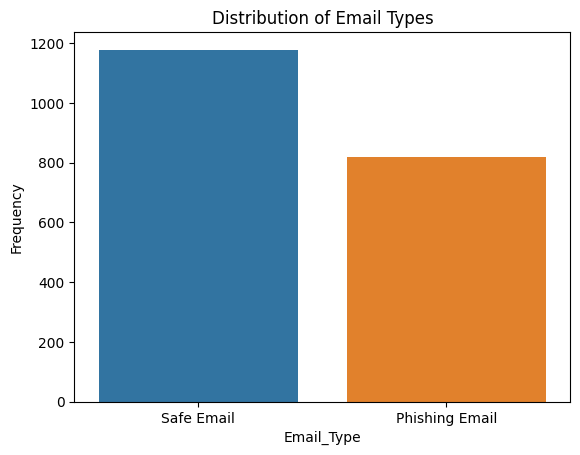

In [9]:
sns.countplot(x='Email_Type',data=df).set(title='Distribution of Email Types',ylabel='Frequency')

# Mapping

In [10]:
le=LabelEncoder()
df['Email_Type']=le.fit_transform(df['Email_Type'])            #safe-1,phishing-0
df

,Email_Text,Email_Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
1995,don ' t be her 2 choice be the first become a ...,0
1996,\nNippon Forex Info Mail\tTD {\n\tfont-family ...,0
1997,get your bsc without any classes sdmidrxvxnto ...,0
1998,movie project hi steph i have found the talent...,0


In [11]:
email=df.Email_Text
email

0       re : 6 . 1100 , disc : uniformitarianism , re ...
1       the other side of * galicismos * * galicismo *...
2       re : equistar deal tickets are you still avail...
3       \nHello I am your hot lil horny toy.\n    I am...
4       software at incredibly low prices ( 86 % lower...
                              ...                        
1995    don ' t be her 2 choice be the first become a ...
1996    \nNippon Forex Info Mail\tTD {\n\tfont-family ...
1997    get your bsc without any classes sdmidrxvxnto ...
1998    movie project hi steph i have found the talent...
1999    business from the desk of mr . tunde lemo depu...
Name: Email_Text, Length: 1997, dtype: object

**Remove special characters**

In [12]:
email=email.str.replace('[^a-zA-Z0-9]+',' ')
email

0       re 6 1100 disc uniformitarianism re 1086 sex l...
1       the other side of galicismos galicismo is a sp...
2       re equistar deal tickets are you still availab...
3        Hello I am your hot lil horny toy I am the on...
4       software at incredibly low prices 86 lower dra...
                              ...                        
1995    don t be her 2 choice be the first become a ti...
1996     Nippon Forex Info Mail TD font family Verdana...
1997    get your bsc without any classes sdmidrxvxnto ...
1998    movie project hi steph i have found the talent...
1999    business from the desk of mr tunde lemo deputy...
Name: Email_Text, Length: 1997, dtype: object

# Stemming

In [13]:
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [14]:
email=email.apply(lambda x:[stemmer.stem(token.lower())for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
email

0       re 6 1100 disc uniformitarian re 1086 sex lang...
1       the other side of galicismo galicismo is a spa...
2       re equistar deal ticket are you still avail to...
3       hello i am your hot lil horni toy i am the one...
4       softwar at incred low price 86 lower draperi s...
                              ...                        
1995    don t be her 2 choic be the first becom a tige...
1996    nippon forex info mail td font famili verdana ...
1997    get your bsc without ani class sdmidrxvxnto ta...
1998    movi project hi steph i have found the talent ...
1999    busi from the desk of mr tund lemo deputi gove...
Name: Email_Text, Length: 1997, dtype: object

Removal of StopWords

In [15]:
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:

email=email.apply(lambda x:[token for token in tk.tokenize(x)if token not in sw]).apply(lambda token:' '.join(token))
email

0       6 1100 disc uniformitarian 1086 sex lang dick ...
1       side galicismo galicismo spanish term name imp...
2       equistar deal ticket still avail assist robert...
3       hello hot lil horni toy one dream veri open mi...
4       softwar incred low price 86 lower draperi seve...
                              ...                        
1995    2 choic first becom tiger bed c ome lnside tod...
1996    nippon forex info mail td font famili verdana ...
1997    get bsc without ani class sdmidrxvxnto take email
1998    movi project hi steph found talent look check ...
1999    busi desk mr tund lemo deputi governor financi...
Name: Email_Text, Length: 1997, dtype: object

In [17]:
# to remove characters with len>2

email=email.apply(lambda x:[token for token in tk.tokenize(x)if len(token)>1]).apply(lambda token:' '.join(token))
email

0       1100 disc uniformitarian 1086 sex lang dick hu...
1       side galicismo galicismo spanish term name imp...
2       equistar deal ticket still avail assist robert...
3       hello hot lil horni toy one dream veri open mi...
4       softwar incred low price 86 lower draperi seve...
                              ...                        
1995    choic first becom tiger bed ome lnside today o...
1996    nippon forex info mail td font famili verdana ...
1997    get bsc without ani class sdmidrxvxnto take email
1998    movi project hi steph found talent look check ...
1999    busi desk mr tund lemo deputi governor financi...
Name: Email_Text, Length: 1997, dtype: object

# Vectorization

In [18]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(email)
print(X)

  (0, 19871)	0.07507749400128716
  (0, 4164)	0.1068320415677636
  (0, 15588)	0.08998183108037602
  (0, 8426)	0.05697006458561205
  (0, 17539)	0.09995345085938015
  (0, 22066)	0.08022095552800948
  (0, 4300)	0.07615497937234117
  (0, 14607)	0.05334684573771631
  (0, 14299)	0.07357963710808885
  (0, 31167)	0.0740643755732996
  (0, 30488)	0.0978300966793558
  (0, 29499)	0.20747802499428586
  (0, 5804)	0.06743344900183888
  (0, 14624)	0.08998183108037602
  (0, 5167)	0.07730556883531857
  (0, 26377)	0.06776939447630063
  (0, 13514)	0.04029697157038272
  (0, 10360)	0.09270199476624978
  (0, 7066)	0.04787859604839797
  (0, 8686)	0.08557930355756636
  (0, 29635)	0.08131583166642996
  (0, 30555)	0.1086194502733262
  (0, 27854)	0.05969022827148582
  (0, 10364)	0.08557930355756636
  (0, 10144)	0.05706006316315901
  :	:
  (1996, 3671)	0.03312073422631149
  (1996, 11963)	0.1584529192020023
  (1996, 6911)	0.08813609302089562
  (1996, 4288)	0.035932708741753035
  (1996, 21232)	0.03342903200797733
  (

In [19]:
# to find the unique values
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zyyqywp', 'zzzlist', 'zzzz'],
      dtype=object)

In [20]:
# convert to array

X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X.shape

(1997, 31450)

In [22]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Email_Type, Length: 1997, dtype: int64

# Train_Test_Split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

# Build Various Models

In [24]:
knn=KNeighborsClassifier()
gnb=GaussianNB()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [25]:
models=[knn,gnb,sv,dtc,rf,ad]
algo_accuracy = []
for model in models:
  print('****************************',model,'***********************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('Accuracy score',accuracy_score(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

**************************** KNeighborsClassifier() ***********************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       238
           1       0.92      0.93      0.92       362

    accuracy                           0.91       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.91      0.91      0.91       600

Accuracy score 0.9066666666666666
**************************** GaussianNB() ***********************************
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       238
           1       0.84      0.94      0.88       362

    accuracy                           0.85       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.85      0.85      0.85       600

Accuracy score 0.8516666666666667
**************************** SVC() ***********************************
              precision    recall  f1-sco

In [26]:
print(algo_accuracy)

[90.66666666666666, 85.16666666666667, 94.66666666666667, 87.83333333333333, 96.66666666666667, 92.0]


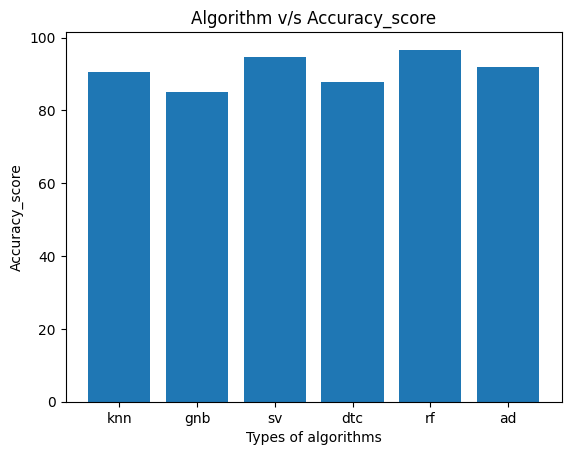

In [27]:
algorithm=['knn','gnb','sv','dtc','rf','ad']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()

# Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=None, bootstrap=False)
rf_classifier.fit(X_resampled, y_resampled)
rf_y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       238
           1       0.97      0.97      0.97       362

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



# Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=None, bootstrap=False)
rf_classifier.fit(X_resampled, y_resampled)
rf1_y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test,rf1_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.99      0.94      0.96       362

    accuracy                           0.96       600
   macro avg       0.95      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



# HyperTextParameter

In [32]:
params={'n_estimators':[25,50,100,150],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}
rf1=RandomizedSearchCV(rf,params)
model_random = rf1.fit(X_train,y_train)

In [33]:
print(rf1.best_estimator_)

RandomForestClassifier(n_estimators=50)


In [34]:
rf_new1=RandomForestClassifier(bootstrap=False,  n_estimators=150)
rf_new1.fit(X_train,y_train)
rf_yy_pred=rf_new1.predict(X_test)
print(classification_report(y_test,rf_yy_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       238
           1       0.98      0.97      0.98       362

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [35]:
print('Accuracy score',accuracy_score(y_test,rf_y_pred)*100)


Accuracy score 96.33333333333334


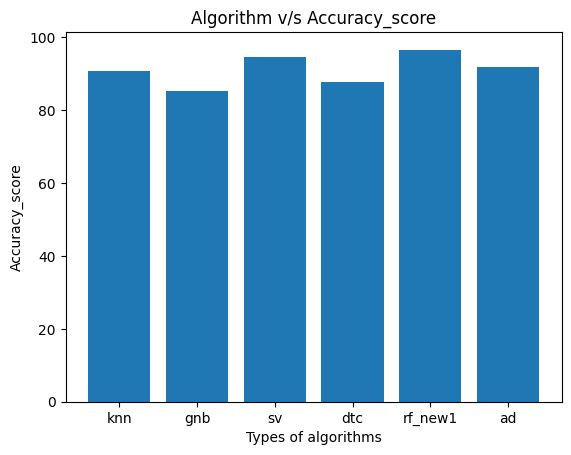

In [36]:
algorithm=['knn','gnb','sv','dtc','rf_new1','ad']
plt.bar(algorithm,algo_accuracy)
plt.plot()
plt.xlabel('Types of algorithms')
plt.ylabel('Accuracy_score')
plt.title('Algorithm v/s Accuracy_score')
plt.show()

# **Predicting new value using dtc,knn**

In [37]:
y_new=knn.predict(vectorizer.transform(['equistar deal ticket still avail assist robert']))
# y_new
result=le.inverse_transform(y_new) #need to fit
print(result.item(),':',y_new.item())

Safe Email : 1


In [38]:
y_new=dtc.predict(vectorizer.transform(['equistar deal ticket still avail assist robert']))
result=le.inverse_transform(y_new) #need to fit
print(result.item(),':',y_new.item())

Safe Email : 1


# **Streamlit**

In [39]:
import pickle
filename='Phishing_nlp.pkl'
vectorizer_file='vectorizer.pkl'
pickle.dump(dtc,open(filename,'wb'))
pickle.dump(vectorizer,open(vectorizer_file,'wb'))

In [40]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [41]:
!wget -q -O - - ipv4.icanhazip.com


35.202.230.228


In [42]:
# !streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
npx: installed 22 in 6.787s
your url is: https://icy-suits-allow.loca.lt
^C


# **Conclusion**

The Random Forest Classifier achieved impressive results with an accuracy of 97 It demonstrated a high ability to correctly classify both legitimate and phishing emails.